In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as pp
import matplotlib
import math
%matplotlib inline

In [33]:
def save(name, data):
    print "save", name, ":", data
    with open(name, 'w') as f:
        f.write(data)
        
def data_target(csv):
    return csv.ix[:, 1:], csv.ix[:, 0]

In [49]:
data = pd.read_csv('data-logistic.csv', header=None)
#data = data.loc[data[1] > -5]
data = pd.DataFrame(data.get_values())
#data = data.replace(-1, 0, axis=0)
data.tail()

,0,1,2
200,1,4.245176,3.053931
201,1,2.437935,1.357804
202,-1,-1.876638,1.533398
203,1,-6.824446,-13.934211
204,-1,0.001805,0.865147


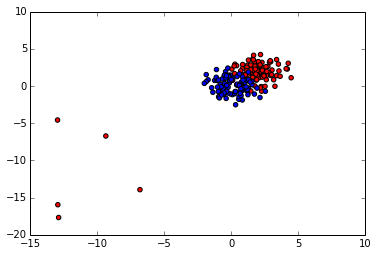

In [50]:
p = data[data[0]>0]
n = data[data[0]<=0]

pp.scatter(p[1], p[2], c='red')
pp.scatter(n[1], n[2], c='blue')

In [51]:
X,Y = data_target(data)

In [188]:
def A(w):
    return [1.0 / (1 + np.exp(-np.dot(v[1:3], w))) for v in data.values]
    
def short(C):
    k = 0.1
    w = np.array([0, 0])
    L = len(Y)
    cnt = 0
    E = 10
    S = []
    while E > 1e-5 and cnt < 10000: 
        w0 = w
        s = np.array([0, 0])
        for i in range(L):
            d = data.values[i]
            y, x = d[0], d[1:3]
            grad = (1-1./(np.exp(-y*np.dot(x, w0))+1))*y
            s = s + grad * x
        S.append([cnt, s])
        w=w0 + k/L*s - k*C*w0
        E = euclidean(w, w0)
        cnt += 1
    print cnt, w
    return w, S
        

In [189]:
r1, S1 = short(10)
r2, S2 = short(0)

#8 0.0285587545462 0.0247801372497
#45 0.123283466995 0.0868452834431

8 [ 0.02855875  0.02478014]
244 [ 0.28781162  0.0919833 ]


In [190]:
a1 = A(r1)
a2 = A(r2)

In [191]:
r1 = roc_auc_score(Y, a1)
r2 = roc_auc_score(Y, a2)

print r1, r2
save("3", "%.3f %.3f" % (r2, r1))

0.936285714286 0.926857142857
save 3 : 0.927 0.936
